Bài tập 1: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối
quan hệ giữa độ tuổi và khả năng bị bệnh tim. Ở đây, target = 1 ngụ ý rằng người đó đang bị bệnh
tim và target = 0 ngụ ý rằng người đó không bị bệnh tim. Hình 3 thể hiện kết quả sau khi thực hiện
đoạn code visualization bên dưới:

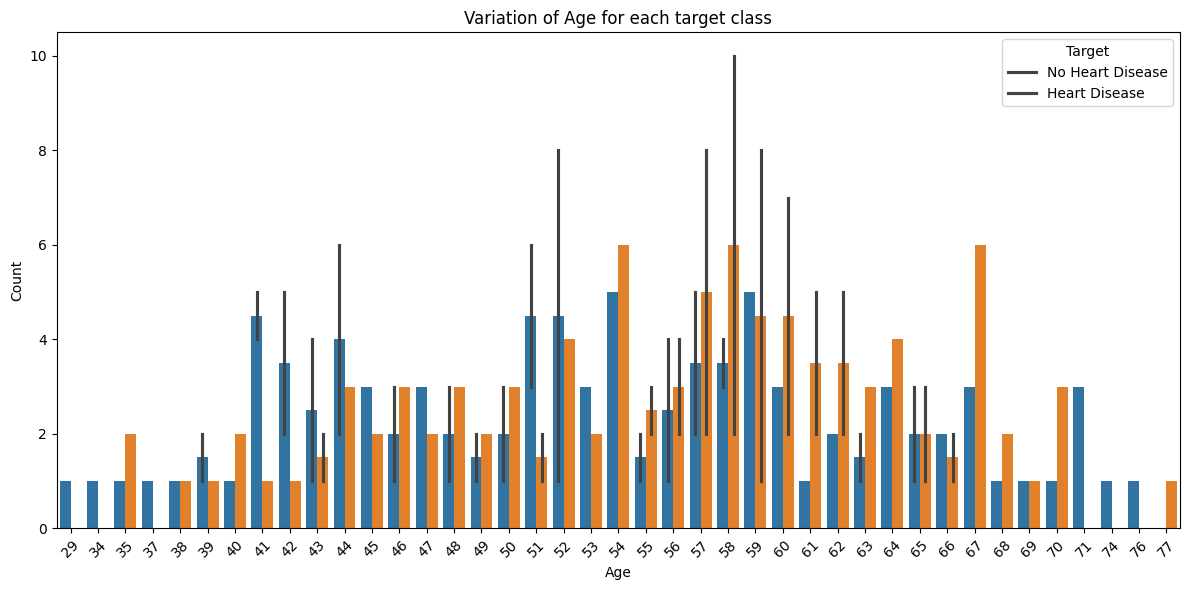

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data loading and preprocessing steps from the previous exercise are already done

# bai tap 2
# barplot of age vs sex with hue = target

plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', hue='target', data=df.groupby(['age', 'target', 'sex']).size().reset_index(name='count'))

plt.title('Variation of Age for each target class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

Bài tập 2: (Data Analysis) hãy hoàn thiện chương trình sau sử dụng thư viện seaborn để hiện thị mối
quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim. Hình 4 thể hiện kết quả sau khi thực hiện đoạn
code visualization bên dưới:

<ipython-input-2-312e35348929>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='age', hue='target', data=df, ci=None)


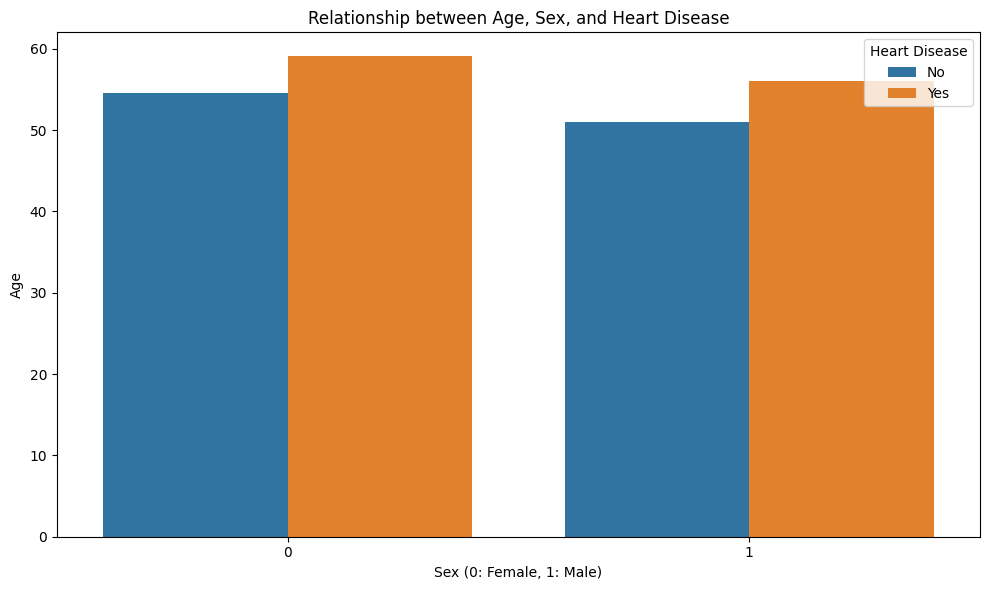

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='age', hue='target', data=df, ci=None)
plt.title('Relationship between Age, Sex, and Heart Disease')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Age')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

Bài tập 3: (sử dụng KNN cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật
KNN để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: n_neighbors=5,
weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’

In [ ]:
# bai tap
from sklearn.model_selection import train_test_split

# Define X and y before using them
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Now you can use X and y in the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# your code here *******************
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                           leaf_size=30, p=2, metric='minkowski')

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Calculate confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


Bài tập 4: (sử dụng SVM cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng giải thuật
SVM để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau: kernel = ’rbf’,
random_state=42

In [ ]:
# bai tap 4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 42)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 42)

# your code here *************************
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

# Initialize SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Calculate confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracies
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


Bài tập 5: (sử dụng Naive Bayes cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng
giải thuật Naive Bayes để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau:
kernel = ’rbf’, random_state=42

In [4]:
# Bài tập 5: Naive Bayes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Load and prepare data
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Calculate accuracies
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Naive Bayes =', accuracy_for_train)
print('Accuracy for test set for Naive Bayes =', accuracy_for_test)

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


Bài tập 6: (sử dụng Decision Tree cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng
giải thuật Decision Tree để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau:
criterion=’gini’, max_depth=10, min_samples_split=2

In [5]:
# Bài tập 6: Decision Tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Load and prepare data
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Calculate accuracies
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Decision Tree =', accuracy_for_train)
print('Accuracy for test set for Decision Tree =', accuracy_for_test)

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


Bài tập 7: (sử dụng Random Forest cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng
giải thuật Random Forest để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số
sau: criterion=’gini’, max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42

In [6]:
# Bài tập 7: Random Forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Load and prepare data
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Calculate accuracies
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Random Forest =', accuracy_for_train)
print('Accuracy for test set for Random Forest =', accuracy_for_test)

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


Bài tập 8: (sử dụng Adaboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng
giải thuật Adaboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau:
n_estimators=50, learning_rate=1.0

In [7]:
# Bài tập 8: AdaBoost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Load and prepare data
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost model
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)

# Predictions
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Calculate accuracies
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for AdaBoost =', accuracy_for_train)
print('Accuracy for test set for AdaBoost =', accuracy_for_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


Bài tập 9: (sử dụng GradientBoost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử
dụng giải thuật GradientBoost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham
số sau: learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,
random_state=42

In [8]:
# Bài tập 9: Gradient Boosting
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Load and prepare data
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0,
                                min_samples_split=2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Calculate accuracies
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for Gradient Boosting =', accuracy_for_train)
print('Accuracy for test set for Gradient Boosting =', accuracy_for_test)

Accuracy for training set for Gradient Boosting = 1.0
Accuracy for test set for Gradient Boosting = 0.85


Bài tập 10: (sử dụng XGboost cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử dụng
giải thuật XGboost để dự đoán bệnh nhân có khả bị bệnh tim hay không sử dụng các tham số sau:
objective="binary:logistic", random_state=42, n_estimators = 100

In [9]:
# Bài tập 10: XGBoost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Load and prepare data
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)

# Predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Calculate accuracies
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print('Accuracy for training set for XGBoost =', accuracy_for_train)
print('Accuracy for test set for XGBoost =', accuracy_for_test)

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


Bài tập 11: (sử dụng kỷ thuật Stacking cho dự đoán bệnh tim) hãy hoàn thiện chương trình sau sử
dụng kỹ thuật Stacking để dự đoán bệnh nhân có khả bị bệnh tim hay bằng cách dùng phương pháp
stacking sử dụng heterogeneous approach với mô hình giải thuật được thể hiện ở hình 1.

In [10]:
# Bài tập 11: Stacking
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import StackingClassifier

# Load and prepare data
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
